# Introduction

### Motivation

Identifying VIP customers is crucial for targeted marketing, personalized services, and enhancing business revenue. Advanced data analysis and feature engineering can uncover the characteristics of these valuable clients.

### Methods (planned to follow)
		
1. Data Understanding: Begin by understanding the structure and content of the dataset.
2. Feature Engineering: Depending on the available features, create new relevant features to help in distinguishing VIP clients from regular ones.
3. Define VIP Criteria: Determine what criteria define a VIP client.
4. Feature Scaling: Ensure that the features are on a similar scale to prevent certain features from dominating the clustering process.
5. Clustering Algorithm: Choose an appropriate clustering algorithm based on the nature of your data and the problem.
6. Evaluation: Evaluate the clustering results to determine the number of clusters and the quality of the clusters formed. 
7. Business Insights: Finally, interpret the results and extract actionable insights that can be used to optimize business strategies and improve customer satisfaction and loyalty.

        

# Dataset



## Description
Description: The dataset contains transactions from an English e-commerce platform, focusing on product details, quantities, and customer information.

## Data overview
1. **InvoiceNo:**
   - Description: A unique identifier for each invoice.
   - Purpose: Identifies individual transactions or purchases.

2. **StockCode:**
   - Description: Code that uniquely identifies each product or item.
   - Purpose: Helps in categorizing and tracking specific products.

3. **Description:**
   - Description: Textual description of the product.
   - Purpose: Provides additional information about the products being sold.

4. **Quantity:**
   - Description: The quantity of each product sold in a particular transaction.
   - Purpose: Indicates the volume of products purchased in each transaction.

5. **InvoiceDate:**
   - Description: Date and time when the transaction occurred.
   - Purpose: Provides a timestamp for each transaction, useful for time-based analysis.

6. **UnitPrice:**
   - Description: The price of a single unit of the product.
   - Purpose: Indicates the cost of each product, essential for revenue calculations.

7. **CustomerID:**
   - Description: Unique identifier for each customer.
   - Purpose: Associates transactions with specific customers, facilitating customer-centric analysis.

8. **Country:**
   - Description: The country where the customer is located.
   - Purpose: Enables analysis based on geographic regions, helping understand global sales patterns.

9. **Unnamed: 8:**
   - Description: Unnamed or mislabeled column (possibly a mistake in data export).
   - Purpose: Typically needs investigation; it might not provide useful information for analysis.

# Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("C:/Users/sagri/Downloads/Ecommerce data.csv", encoding='latin-1')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN


# Structured Based Data Exploration

## Purpose of EDA:
To understand data distribution, detect outliers, and identify patterns.
To recognize which features are most relevant for identifying VIP customers.

## Tools of EDA:
Descriptive statistics, correlation matrices, and data visualizations such as histograms, scatter plots, and box plots.

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France,NaN


In [6]:
df['Unnamed: 8'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 8, dtype: float64

In [7]:
df.drop('Unnamed: 8', axis=1, inplace=True)

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


In [9]:
df.shape

(541909, 8)

In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [12]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Duplicate rows found:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

       InvoiceDate  UnitPrice  CustomerID         Country  
517      29-Nov-1

In [13]:
# Remove duplicate rows
df = df.drop_duplicates()
print("Shape of DataFrame after removing duplicates:", df.shape)


Shape of DataFrame after removing duplicates: (536640, 8)


In [14]:
# Descriptive statistics
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536640,536640,535186,536640.000000,536640,536640.000000,401603.000000,536640
unique,25900,4070,4223,NaN,305,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,3-Dec-17,NaN,NaN,United Kingdom
freq,1114,2301,2357,NaN,5292,NaN,NaN,490299
mean,NaN,NaN,NaN,9.620043,NaN,4.632661,15281.162093,NaN
std,NaN,NaN,NaN,219.130360,NaN,97.233208,1714.008032,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15145.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16784.000000,NaN


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536640 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536640 non-null  object 
 1   StockCode    536640 non-null  object 
 2   Description  535186 non-null  object 
 3   Quantity     536640 non-null  int64  
 4   InvoiceDate  536640 non-null  object 
 5   UnitPrice    536640 non-null  float64
 6   CustomerID   401603 non-null  float64
 7   Country      536640 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB
None


## Data Cleaning
Handling Missing Values:

In [16]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [17]:
# Handling missing values by dropping or imputing
df.dropna(inplace=True)  

C:\Users\sagri\AppData\Local\Temp\ipykernel_9208\1892267642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


## Univariate, Bivariate, and Multivariate Analysis
### Univariate Analysis:

<AxesSubplot:xlabel='QuantityRange', ylabel='count'>

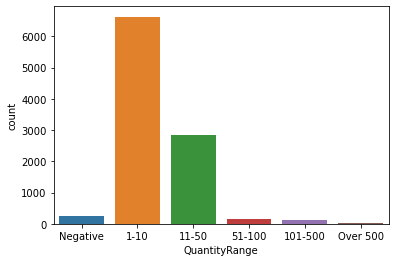

In [18]:
sample_df = df.sample(n=10000, random_state=1)
bins = [-np.inf, 0, 10, 50, 100, 500, np.inf]
labels = ['Negative', '1-10', '11-50', '51-100', '101-500', 'Over 500']
sample_df['QuantityRange'] = pd.cut(sample_df['Quantity'], bins=bins, labels=labels)
sns.countplot(x='QuantityRange', data=sample_df, order=labels)

From the plot, we observe that the most common range of quantities falls within '1-10', indicating that a significant portion of transactions involves the purchase of small quantities of products. The next most frequent range is '11-50', followed by '51-100'.
Additionally, there is a small number of transactions with negative quantities, likely representing returns or errors in the data.

### Bivariate Analysis:

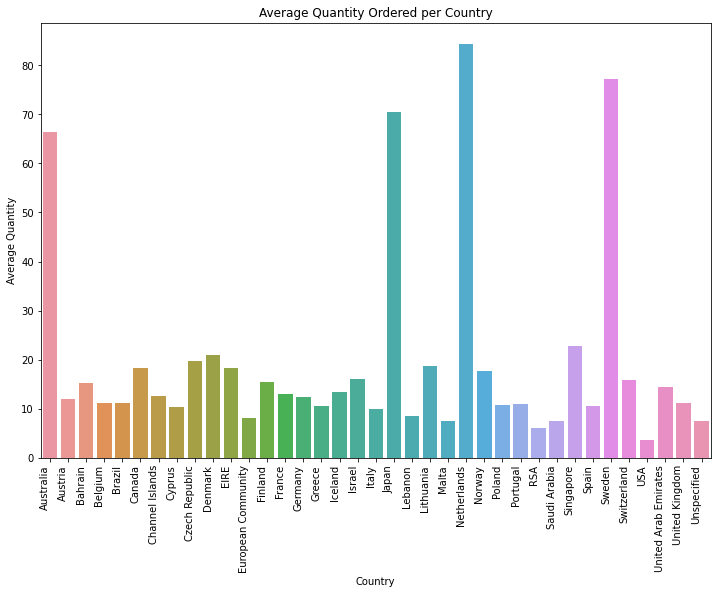

In [19]:
# Calculate average quantity per country
avg_quantity_per_country = df.groupby('Country')['Quantity'].mean().reset_index()
plt.figure(figsize=(12, 8))  
barplot = sns.barplot(x='Country', y='Quantity', data=avg_quantity_per_country)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.title('Average Quantity Ordered per Country')
plt.xlabel('Country')
plt.ylabel('Average Quantity')

plt.show()



From the visualization, we observe variations in the average quantity ordered across different countries. Some countries have higher average quantities, while others have lower averages.

C:\Users\sagri\AppData\Local\Temp\ipykernel_9208\1809379071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Range'] = pd.cut(df['UnitPrice'], bins=[0, 1, 5, 10, 50, 100, 500])


<AxesSubplot:xlabel='Price Range', ylabel='Quantity'>

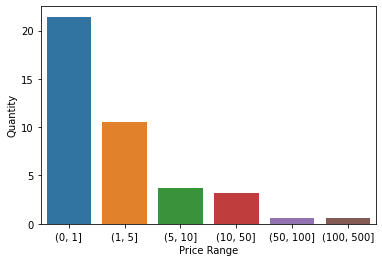

In [20]:
df['Price Range'] = pd.cut(df['UnitPrice'], bins=[0, 1, 5, 10, 50, 100, 500])
avg_quantity_per_price_range = df.groupby('Price Range')['Quantity'].mean().reset_index()
sns.barplot(x='Price Range', y='Quantity', data=avg_quantity_per_price_range)


The plot shows the relationship between the price of items and the quantity that people order. Specifically, it visualizes the average quantity of items ordered in each of the defined price ranges. This plot suggests that customers tend to buy more items when the price is lower.

### Multivariate

<AxesSubplot:>

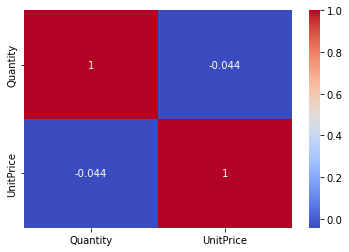

In [21]:
corr = sample_df[['Quantity', 'UnitPrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In this chart, we see that the 'Quantity' and 'UnitPrice' have a weak relationship between them, which is quite normal because usually, when the quantity of items increases, the unit price tends to stay the same or decrease slightly.

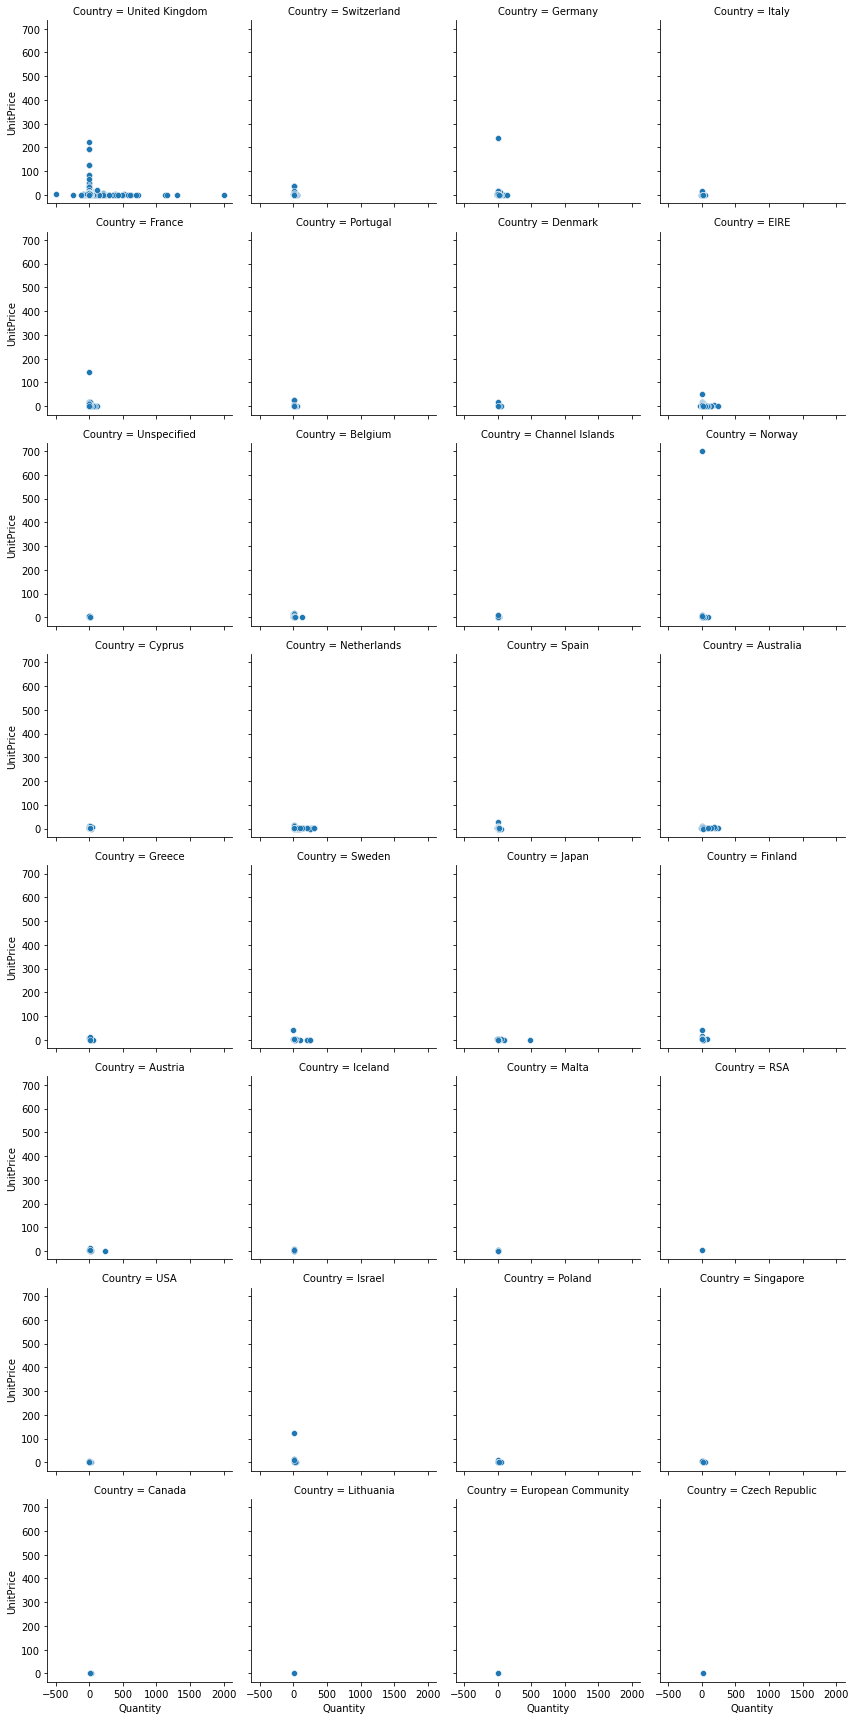

In [22]:
g = sns.FacetGrid(sample_df, col="Country", col_wrap=4, height=3)
g.map(sns.scatterplot, "Quantity", "UnitPrice")


This chart displays multiple scatter plots, one for each country. Each plot shows how the quantity of items purchased relates to the unit price for transactions in that country.